## **Importing all the essential libraries**
---
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('data/vehicles.csv')

# **Exploratory Data Analysis (EDA)**

In [3]:
df.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
26866,7312708591,https://fresno.craigslist.org/ctd/d/atlanta-20...,fresno / madera,https://fresno.craigslist.org,39990,2019.0,nissan,370z nismo coupe 2d,good,6 cylinders,...,NaN,coupe,white,https://images.craigslist.org/00v0v_ihZKB5WEx8...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-26T04:20:54-0700
23424,7303491822,https://bakersfield.craigslist.org/ctd/d/tempe...,bakersfield,https://bakersfield.craigslist.org,35995,2013.0,ford,f-150 fx4 lifted crew ecoboost 3.5liter,NaN,6 cylinders,...,NaN,pickup,silver,https://images.craigslist.org/00A0A_3zlILisH6s...,2013 Ford F-150 FX4 LIFTED CREW ECOBOOST 3.5LI...,NaN,ca,33.391700,-111.924900,2021-04-07T20:28:29-0700
283722,7315138215,https://nh.craigslist.org/ctd/d/concord-2008-t...,new hampshire,https://nh.craigslist.org,11995,2008.0,toyota,tundra,excellent,NaN,...,NaN,pickup,blue,https://images.craigslist.org/00l0l_e0aD9NdJFv...,2008 Toyota Tundra SR5 4x2 4dr Double Cab SB (...,NaN,nh,43.188723,-71.504929,2021-04-30T21:36:50-0400
404536,7307555597,https://kpr.craigslist.org/ctd/d/moses-lake-21...,kennewick-pasco-richland,https://kpr.craigslist.org,17900,2011.0,chevrolet,tahoe lt,excellent,8 cylinders,...,NaN,SUV,NaN,https://images.craigslist.org/01010_28ApKtNvuj...,"$210/mo - 2011 Chevrolet Tahoe LT158,192 mi. -...",NaN,wa,47.104226,-119.250561,2021-04-15T20:31:26-0700
229246,7309274969,https://missoula.craigslist.org/ctd/d/missoula...,missoula,https://missoula.craigslist.org,9990,2016.0,hyundai,elantra gt,good,4 cylinders,...,NaN,hatchback,white,https://images.craigslist.org/00W0W_1vgviFr7Ps...,"2016 Hyundai Elantra GT A/T - $9,990 Year: 20...",NaN,mt,46.977600,-114.061900,2021-04-19T09:56:28-0600


In [4]:
df.index = [0] * len(df)

In [5]:
df.shape

(426880, 26)

In [6]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

### **Checking total missing values**
---

In [7]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426880 entries, 0 to 0
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  paint_col

## **Data Cleaning**
---
---

### **Extracting important features (Feature Selection)**
---

In [9]:
df.drop(['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size', 'state'], axis=1, inplace=True)

### **Handling missing values**
---
---

In [10]:
df.isna().sum()/df.shape[0]*100

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
dtype: float64

**We can see that "year", "manufacturer", "model", and "odometer" column has less than 5% of null values. So we can simply drop those rows which have null values in these two columns.**

In [11]:
df = df.dropna(subset=['year', 'odometer', 'manufacturer', 'model'])

**For all the missing values in other columns, we have just converted them in to a new category, "unknown"**

In [12]:
df.fillna('unknown', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399883 entries, 0 to 0
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        399883 non-null  object 
 1   price         399883 non-null  int64  
 2   year          399883 non-null  float64
 3   manufacturer  399883 non-null  object 
 4   model         399883 non-null  object 
 5   condition     399883 non-null  object 
 6   cylinders     399883 non-null  object 
 7   fuel          399883 non-null  object 
 8   odometer      399883 non-null  float64
 9   title_status  399883 non-null  object 
 10  transmission  399883 non-null  object 
 11  drive         399883 non-null  object 
 12  type          399883 non-null  object 
 13  paint_color   399883 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.8+ MB


### **Handling duplicated values**
---
---

In [14]:
df.duplicated().sum()

53043

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(346840, 14)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346840 entries, 0 to 0
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        346840 non-null  object 
 1   price         346840 non-null  int64  
 2   year          346840 non-null  float64
 3   manufacturer  346840 non-null  object 
 4   model         346840 non-null  object 
 5   condition     346840 non-null  object 
 6   cylinders     346840 non-null  object 
 7   fuel          346840 non-null  object 
 8   odometer      346840 non-null  float64
 9   title_status  346840 non-null  object 
 10  transmission  346840 non-null  object 
 11  drive         346840 non-null  object 
 12  type          346840 non-null  object 
 13  paint_color   346840 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 39.7+ MB


### **Categorical data cleaning**
---

In [18]:
manufacturer_values = df['manufacturer'].value_counts()

In [19]:
print(manufacturer_values)

ford               60022
chevrolet          46111
toyota             29054
honda              18088
jeep               15913
nissan             15796
ram                14641
gmc                14283
bmw                12802
dodge              11137
mercedes-benz      10083
hyundai             8438
volkswagen          8283
subaru              8193
lexus               7138
kia                 6969
audi                6816
cadillac            5911
acura               5469
chrysler            5103
buick               4753
mazda               4702
infiniti            4319
lincoln             3764
volvo               2907
mitsubishi          2874
mini                2090
pontiac             2022
jaguar              1813
rover               1572
porsche             1179
mercury             1005
saturn               932
alfa-romeo           859
tesla                812
fiat                 699
harley-davidson      121
ferrari               69
datsun                61
aston-martin          22


In [20]:
temp=df['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')
temp.value_counts()

ford             60022
chevrolet        46111
others           36590
toyota           29054
honda            18088
jeep             15913
nissan           15796
ram              14641
gmc              14283
bmw              12802
dodge            11137
mercedes-benz    10083
hyundai           8438
volkswagen        8283
subaru            8193
lexus             7138
kia               6969
audi              6816
cadillac          5911
acura             5469
chrysler          5103
Name: manufacturer, dtype: int64

In [21]:
df['manufacturer'] = df['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')

In [22]:
df['region'].value_counts()

minneapolis / st paul    2812
seattle-tacoma           2758
portland                 2749
sacramento               2725
SF bay area              2699
                         ... 
meridian                   20
southwest MS               13
fort smith, AR              8
kansas city                 8
west virginia (old)         7
Name: region, Length: 404, dtype: int64

In [23]:
len(df['region'].value_counts())

404

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346840 entries, 0 to 0
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        346840 non-null  object 
 1   price         346840 non-null  int64  
 2   year          346840 non-null  float64
 3   manufacturer  346840 non-null  object 
 4   model         346840 non-null  object 
 5   condition     346840 non-null  object 
 6   cylinders     346840 non-null  object 
 7   fuel          346840 non-null  object 
 8   odometer      346840 non-null  float64
 9   title_status  346840 non-null  object 
 10  transmission  346840 non-null  object 
 11  drive         346840 non-null  object 
 12  type          346840 non-null  object 
 13  paint_color   346840 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 39.7+ MB


In [25]:
df.drop('region',axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346840 entries, 0 to 0
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         346840 non-null  int64  
 1   year          346840 non-null  float64
 2   manufacturer  346840 non-null  object 
 3   model         346840 non-null  object 
 4   condition     346840 non-null  object 
 5   cylinders     346840 non-null  object 
 6   fuel          346840 non-null  object 
 7   odometer      346840 non-null  float64
 8   title_status  346840 non-null  object 
 9   transmission  346840 non-null  object 
 10  drive         346840 non-null  object 
 11  type          346840 non-null  object 
 12  paint_color   346840 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 37.0+ MB


In [27]:
model_values = df['model'].value_counts()
model_values

f-150                        6452
silverado 1500               4169
1500                         3345
camry                        2510
silverado                    2502
                             ... 
740lxi xdrive                   1
6 series 2dr cpe 640i rwd       1
fx4 sport f15o                  1
1500trx trx                     1
gand wagoneer                   1
Name: model, Length: 23539, dtype: int64

In [28]:
df['model'] = df['model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

In [29]:
for i in df.columns:
  print(i, len(df[i].value_counts().index))

price 15274
year 107
manufacturer 21
model 51
condition 7
cylinders 9
fuel 6
odometer 101980
title_status 7
transmission 4
drive 4
type 14
paint_color 13


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346840 entries, 0 to 0
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         346840 non-null  int64  
 1   year          346840 non-null  float64
 2   manufacturer  346840 non-null  object 
 3   model         346840 non-null  object 
 4   condition     346840 non-null  object 
 5   cylinders     346840 non-null  object 
 6   fuel          346840 non-null  object 
 7   odometer      346840 non-null  float64
 8   title_status  346840 non-null  object 
 9   transmission  346840 non-null  object 
 10  drive         346840 non-null  object 
 11  type          346840 non-null  object 
 12  paint_color   346840 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 37.0+ MB


### **Numerical Data Cleaning**
---

In [31]:
df.describe()

,price,year,odometer
count,3.468400e+05,346840.000000,3.468400e+05
mean,6.997499e+04,2011.526814,9.501220e+04
std,1.213391e+07,8.876408,1.848760e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,6.000000e+03,2008.000000,3.600000e+04
50%,1.458800e+04,2014.000000,8.358900e+04
75%,2.699000e+04,2017.000000,1.330000e+05
max,3.736929e+09,2022.000000,1.000000e+07


**Our dataset have lots of outliers. Outliers reduces the accuracy of a model. We have to detect outliers and remove them.**

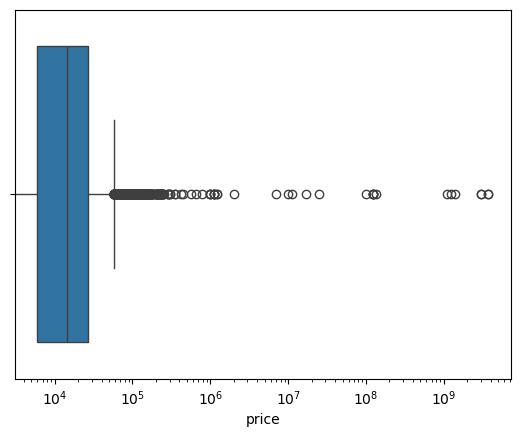

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='price')
plt.xscale('log')
plt.show()


In [33]:
price_percentile25 = df['price'].quantile(0.25)
price_percentile75 = df['price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25

In [34]:
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = df['price'].quantile(0.15)

In [35]:
len(df[(df['price'] < price_upper_limit) & (df['price'] > price_lower_limit)])

288669

In [36]:
len(df)

346840

In [37]:
print("total outliers - ",len(df)-len(df[(df['price'] < price_upper_limit) & (df['price'] > price_lower_limit)]))

total outliers -  58171


In [38]:
new_df = df[(df['price'] < price_upper_limit) & (df['price'] > price_lower_limit)]

In [39]:
odometer_percentile75 = df['odometer'].quantile(0.75)
odometer_percentile25 = df['odometer'].quantile(0.25)
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = df['odometer'].quantile(0.05)

In [40]:
new_df = new_df[(new_df['odometer'] < odometer_upper_limit) & (new_df['odometer'] > odometer_lower_limit)]

In [41]:
new_df.index = [0] * len(new_df)

In [42]:
new_df.shape

(273590, 13)

In [43]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273590 entries, 0 to 0
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         273590 non-null  int64  
 1   year          273590 non-null  float64
 2   manufacturer  273590 non-null  object 
 3   model         273590 non-null  object 
 4   condition     273590 non-null  object 
 5   cylinders     273590 non-null  object 
 6   fuel          273590 non-null  object 
 7   odometer      273590 non-null  float64
 8   title_status  273590 non-null  object 
 9   transmission  273590 non-null  object 
 10  drive         273590 non-null  object 
 11  type          273590 non-null  object 
 12  paint_color   273590 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 29.2+ MB


## **Feature Engineering**
---
---

In [44]:
new_df.sample(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,21990,2016.0,others,others,good,unknown,other,41251.0,clean,other,rwd,convertible,white
0,14995,2013.0,chevrolet,silverado 1500,excellent,6 cylinders,gas,99927.0,clean,automatic,rwd,truck,unknown
0,14500,2010.0,ford,others,excellent,6 cylinders,gas,72000.0,clean,automatic,4wd,SUV,black
0,10800,2006.0,others,others,excellent,4 cylinders,gas,101822.0,clean,manual,rwd,unknown,unknown
0,35000,2012.0,gmc,others,unknown,8 cylinders,diesel,144000.0,clean,automatic,4wd,unknown,unknown


In [45]:
new_df['odometer'] = new_df['odometer'].astype(int)

In [46]:
new_df.sample(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,16850,1954.0,chevrolet,others,unknown,unknown,gas,38000,clean,manual,unknown,unknown,unknown
0,5500,2012.0,hyundai,others,excellent,4 cylinders,gas,130000,clean,manual,fwd,other,silver
0,16500,2005.0,nissan,others,like new,6 cylinders,gas,23500,clean,automatic,rwd,coupe,silver
0,34526,2016.0,chevrolet,tahoe,unknown,8 cylinders,gas,62262,clean,automatic,rwd,SUV,custom
0,20495,2017.0,others,others,like new,8 cylinders,gas,39555,clean,automatic,fwd,sedan,silver


In [47]:
new_df['year'] = new_df['year'].astype(int)

In [48]:
new_df.sample(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,32990,2020,jeep,others,good,unknown,gas,20581,clean,other,4wd,SUV,silver
0,23590,2017,others,others,good,unknown,other,25484,clean,other,unknown,sedan,unknown
0,28988,2018,subaru,forester,unknown,4 cylinders,gas,30311,clean,automatic,4wd,SUV,white
0,4800,2008,honda,others,unknown,4 cylinders,gas,149466,clean,automatic,fwd,sedan,black
0,8750,2015,ford,others,unknown,6 cylinders,gas,147435,clean,automatic,fwd,sedan,custom


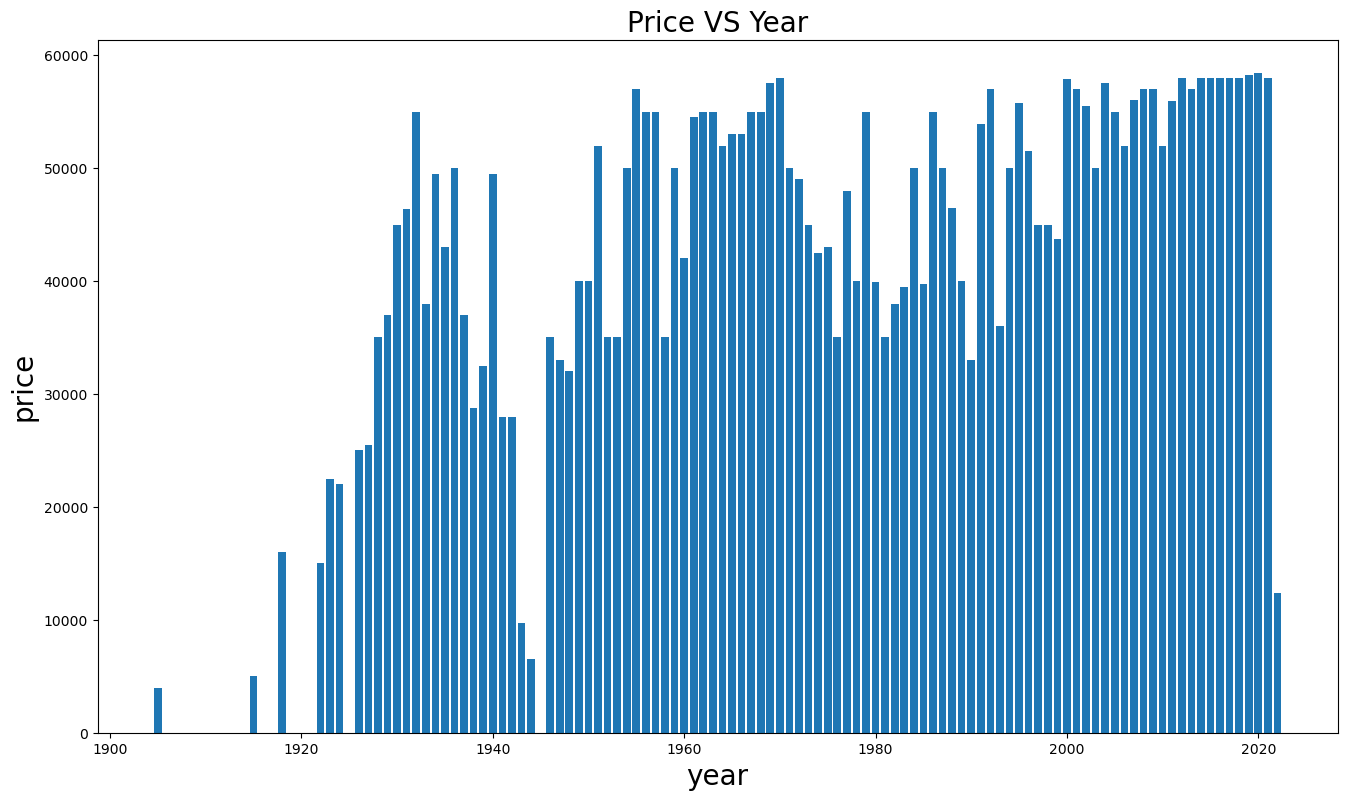

In [49]:
plt.figure(figsize =(16,9))
plt.bar(new_df['year'], new_df['price'])
plt.title("Price VS Year", fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()


In [50]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273590 entries, 0 to 0
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         273590 non-null  int64 
 1   year          273590 non-null  int64 
 2   manufacturer  273590 non-null  object
 3   model         273590 non-null  object
 4   condition     273590 non-null  object
 5   cylinders     273590 non-null  object
 6   fuel          273590 non-null  object
 7   odometer      273590 non-null  int64 
 8   title_status  273590 non-null  object
 9   transmission  273590 non-null  object
 10  drive         273590 non-null  object
 11  type          273590 non-null  object
 12  paint_color   273590 non-null  object
dtypes: int64(3), object(10)
memory usage: 29.2+ MB


In [51]:
new_df['car_age'] = 2022 - new_df['year']
new_df.drop(['year'], axis = 1, inplace = True)
new_df.describe()

,price,odometer,car_age
count,273590.000000,273590.000000,273590.000000
mean,19373.714204,90602.902160,10.115132
std,12026.592402,57099.376602,7.940248
min,3525.000000,6958.000000,0.000000
25%,8995.000000,40405.000000,5.000000
50%,16950.000000,85042.000000,8.000000
75%,27990.000000,130225.000000,13.000000
max,58448.000000,278495.000000,117.000000


## **Data Visualization**
---
---

In [52]:
sample_data = new_df.sample(100)

<Axes: >

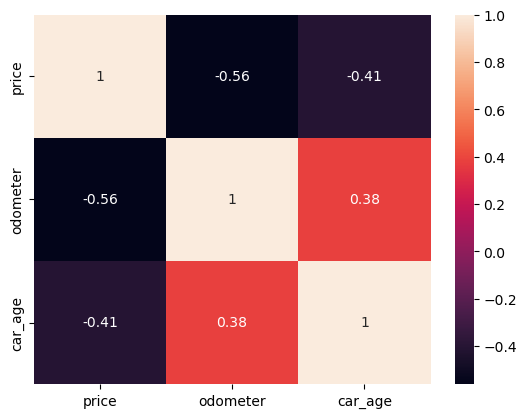

In [53]:
new_df_1 = new_df.select_dtypes(include=['float', 'int'])
sns.heatmap(new_df_1.corr(), annot=True)

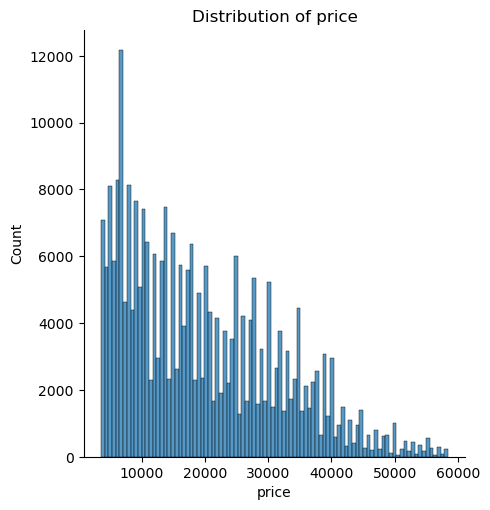

In [54]:
sns.displot(new_df.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

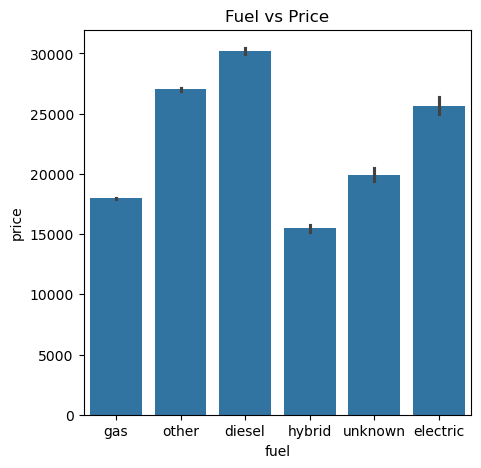

In [55]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='fuel',y='price',data=new_df,ax=axs)
axs.set_title('Fuel vs Price')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

## **Data Preprocessing**
---
---

In [57]:
new_df.columns

Index(['price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'car_age'],
      dtype='object')

In [58]:
final_df = new_df.copy()

### **Creating encoder and implimenting them into pipeline**
---
---

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
pipe_categorical = Pipeline(
    steps=[
        ('ordinal_encoder', OrdinalEncoder(categories=[['salvage', 'fair', 'unknown', 'good', 'excellent', 'like new', 'new']])),
        ('one_hot_encoder', OneHotEncoder(sparse_output=False, drop='first'))
    ]
)

In [61]:
pipe_numerical = Pipeline(
    steps = [('standard_scaler', StandardScaler())]
)

In [62]:
column_transformer = ColumnTransformer(transformers=[
    ('condition_pipe_trans', Pipeline(
        steps=[('ordinal_encoder', OrdinalEncoder(categories=[['salvage', 'fair', 'unknown', 'good', 'excellent', 'like new', 'new']]))]),
     ['condition']),
    ('categorical_pipe_trans', Pipeline(
        steps=[('one_hot_encoder', OneHotEncoder(sparse_output=False, drop='first'))]),
     ['model', 'manufacturer', 'fuel', 'cylinders', 'title_status', 'transmission', 'drive', 'type', 'paint_color']),
    ('numerical_pipe_trans', pipe_numerical, ['odometer'])
])

#### **Train-test-split**
---

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['price'], axis = 1), final_df['price'], random_state = 42, test_size = .2)

In [65]:
X_train.index = [0] * len(X_train)
X_test.index = [0] * len(X_test)
y_train.index = [0] * len(y_train)
y_test.index = [0] * len(X_test)

In [66]:
print(X_train.columns)

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'car_age'],
      dtype='object')


In [67]:
X_train_tnf = column_transformer.fit_transform(X_train)

In [68]:
X_test_tnf = column_transformer.transform(X_test)

In [69]:
print(pd.DataFrame(X_train_tnf).shape)
print(pd.DataFrame(X_test_tnf).shape)

(218872, 122)
(54718, 122)


# **Model Training**

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [71]:
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % r2_score(y_test,y_pred))
    r.append('%.4f' % (r2_score(y_test,y_pred)*100))
    r.append('%.2f' % mean_squared_error(y_test, y_pred))
    r.append('%.2f' % mean_absolute_error(y_test, y_pred))
    r.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return (r)

#dataframe that store the performance of each model
score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

**Linear Regression**

In [72]:
LR = LinearRegression()
LR.fit(X_train_tnf, y_train)
y_pred = LR.predict(X_test_tnf)

In [73]:
R2_score = r2_score(y_test, y_pred)*100
score_lr = result(y_test, y_pred)
score_data['Linear Regression'] = score_lr
print('R2_score: ', score_lr[0])
print('Mean squared error: ', score_lr[2])
print('Mean absolute error: ', score_lr[3])
print('Root mean squared error: ', score_lr[4])

R2_score:  0.6264
Mean squared error:  54250663.20
Mean absolute error:  5560.76
Root mean squared error:  7365.50


**K-Nearest Neighbour**

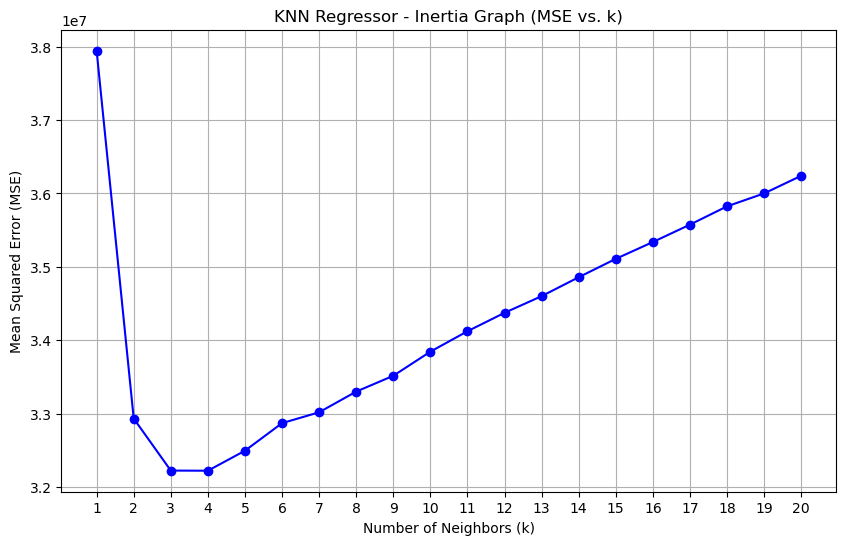

In [74]:
k_values = range(1, 21)  # k from 1 to 20
errors = []

# Train and calculate errors
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_tnf, y_train)
    y_pred = model.predict(X_test_tnf)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', linestyle='-', color='b')
plt.title('KNN Regressor - Inertia Graph (MSE vs. k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid()
plt.show()

In [75]:
KNN = KNeighborsRegressor(n_neighbors=3) 
KNN.fit(X_train_tnf, y_train)
y_pred = KNN.predict(X_test_tnf)

In [76]:
score_knn = result(y_test, y_pred)
score_data['K-Nearest Neighbour'] = score_knn
print('R2 score: ', score_knn[0])
print('Mean squared error: ', score_knn[2])
print('Mean absolute error: ', score_knn[3])
print('Root mean squared error: ', score_knn[4])

R2 score:  0.7781
Mean squared error:  32224245.03
Mean absolute error:  3244.18
Root mean squared error:  5676.64


**Random Forest Regression**

In [77]:
RFR = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
RFR.fit(X_train_tnf, y_train)
y_pred = RFR.predict(X_test_tnf)

In [78]:
score_rfr = result(y_test, y_pred)
score_data['Random Forest Regression'] = score_rfr
print('R2 score: ', score_rfr[0])
print('Mean squared error: ', score_rfr[2])
print('Mean absolute error: ', score_rfr[3])
print('Root mean squared error: ', score_rfr[4])

R2 score:  0.8459
Mean squared error:  22375349.55
Mean absolute error:  2640.02
Root mean squared error:  4730.26


**Decision Tree Regressor**

In [79]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train_tnf, y_train)
y_pred = DTR.predict(X_test_tnf)

In [80]:
score_dtr = result(y_test, y_pred)
score_data['Decision Tree Regressor'] = score_dtr
print('R2 score: ', score_dtr[0])
print('Mean squared error: ', score_dtr[2])
print('Mean absolute error: ', score_dtr[3])
print('Root mean squared error: ', score_dtr[4])

R2 score:  0.7251
Mean squared error:  39918684.96
Mean absolute error:  3216.00
Root mean squared error:  6318.12


# **Overall result and model selection**

In [81]:
score_data

,Linear Regression,K-Nearest Neighbour,Random Forest Regression,Decision Tree Regressor
R2 Score,0.6264,0.7781,0.8459,0.7251
Accuracy(%),62.6378,77.8073,84.5902,72.5082
Mean Squared Error,54250663.20,32224245.03,22375349.55,39918684.96
Mean Absolute Error,5560.76,3244.18,2640.02,3216.00
Root MSE,7365.50,5676.64,4730.26,6318.12


In [82]:
for i in score_data.columns:
  score_data[i] = score_data[i].astype(float)
model_accuracy = score_data.loc['Accuracy(%)']

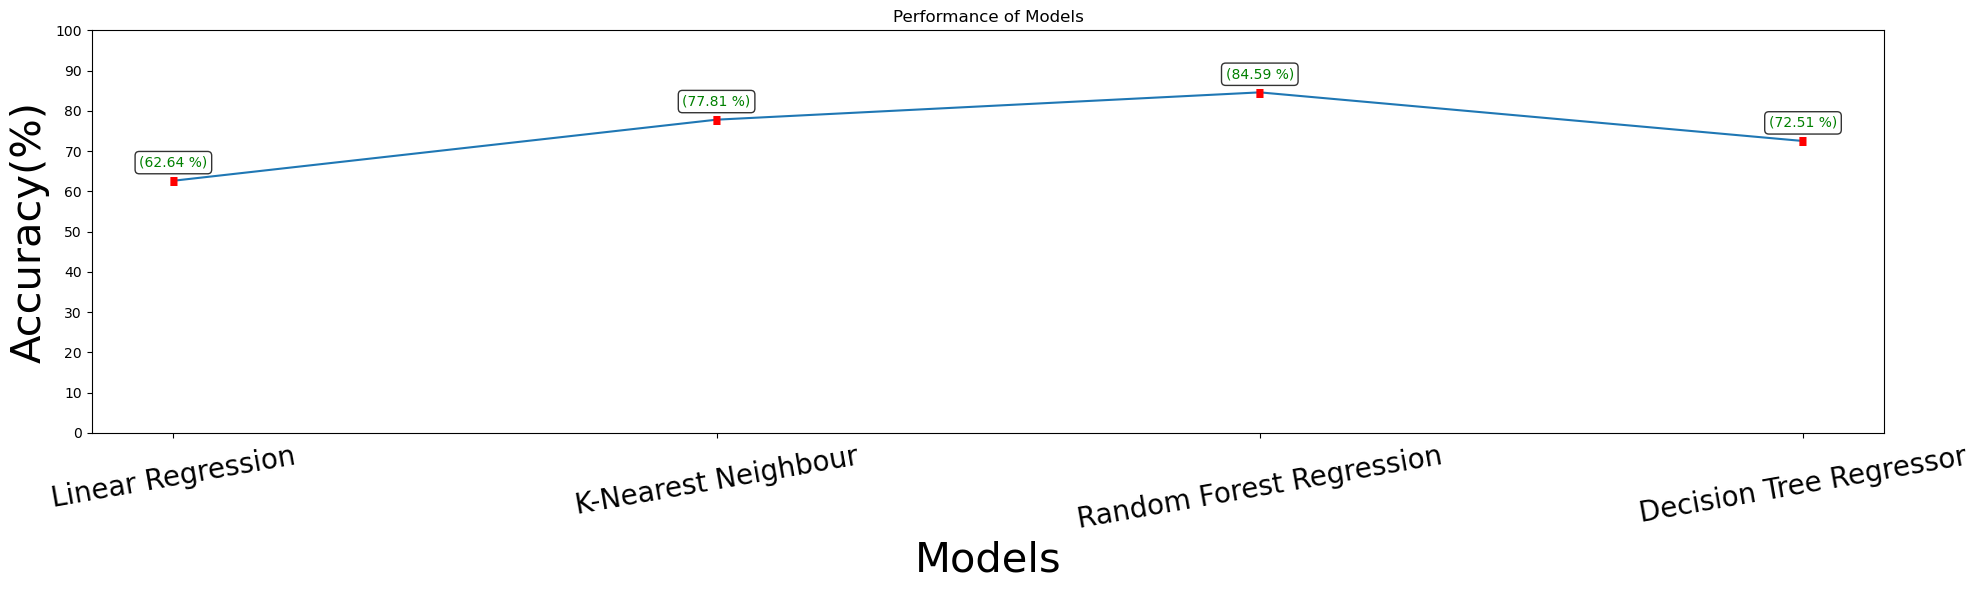

In [83]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show()

# **Final Model Analysis**

In [84]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pickle

final_df = pd.read_csv('data/vehicles.csv')

final_df = final_df.sample(1000, random_state=42)  #smaller dataset for testing

categorical_columns = [
    'condition', 'model', 'manufacturer', 'fuel', 'cylinders', 
    'title_status', 'transmission', 'drive', 'type', 'paint_color'
]
final_df[categorical_columns] = final_df[categorical_columns].fillna('unknown')

# Fill missing numerical features with the mean
final_df['odometer'] = final_df['odometer'].fillna(final_df['odometer'].mean())

# preprocessing for the 'condition' column using OrdinalEncoder
pipe_condition = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),  # Handle NaNs
    ('ordinal_encoder', OrdinalEncoder(categories=[['salvage', 'fair', 'unknown', 'good', 'excellent', 'like new', 'new']]))
])

# preprocessing for other categorical features using OneHotEncoder
pipe_categorical = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),  # Handle NaNs
    ('one_hot_encoder', OneHotEncoder(sparse_output=False, drop='first'))  # One-hot encoding
])

# preprocessing for numerical features using StandardScaler
pipe_numerical = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle NaNs
    ('standard_scaler', StandardScaler())  # Scale numerical values
])

# Combine preprocessing pipelines
column_transformer = ColumnTransformer(
    transformers=[
        ('condition_pipe', pipe_condition, ['condition']),  # OrdinalEncoder for 'condition'
        ('categorical_pipe', pipe_categorical, 
         ['model', 'manufacturer', 'fuel', 'cylinders', 'title_status', 'transmission', 'drive', 'type', 'paint_color']),  # OneHotEncoder for other categories
        ('numerical_pipe', pipe_numerical, ['odometer'])  # StandardScaler for 'odometer'
    ]
)

# RandomForestRegressor pipeline
final_pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('regressor', RandomForestRegressor(
        n_estimators=150, 
        random_state=42, 
        min_samples_leaf=1, 
        max_features=0.3, 
        n_jobs=-1, 
        oob_score=True
    ))
])

# Split the data into training and testing sets
X = final_df.drop(columns=['price'])
y = final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
print("Training the pipeline...")
final_pipeline.fit(X_train, y_train)

# Save the trained pipeline to a .pkl file
with open('final_pipeline.pkl', 'wb') as file:
    pickle.dump(final_pipeline, file)

print("Pipeline saved successfully as 'final_pipeline.pkl'.")

Training the pipeline...
Pipeline saved successfully as 'final_pipeline.pkl'.
